In [1]:
import requests
import zipfile
import os

url = "https://github.com/abachaa/MedQuAD/archive/refs/heads/master.zip"
response = requests.get(url)
with open("medquad.zip", "wb") as f:
    f.write(response.content)
with zipfile.ZipFile("medquad.zip", "r") as zip_ref:
    zip_ref.extractall("data/raw/medquad")
os.remove("medquad.zip")
# Now process: Each folder has XML files with Q&A.

In [2]:
import random
import pandas as pd

# ----------------------------
# 1. Sample lists for synthetic generation
# ----------------------------
hospital_names = [
    "Apollo Hospital", "Fortis Healthcare", "MIOT Hospital", "Kauvery Hospital",
    "Global Health City", "SRM Medical Center", "Medway Hospital",
    "Vijaya Hospital", "Billroth Hospitals", "SIMS Hospital"
]

# Chennai areas instead of multiple cities
chennai_areas = [
    "Anna Nagar", "T. Nagar", "Velachery", "Tambaram", "Adyar", "Porur", "Guindy",
    "Chromepet", "Ambattur", "Sholinganallur", "Mylapore", "Pallavaram", "Saidapet"
]

specializations = [
    "Cardiology", "Neurology", "Orthopedics", "Dermatology",
    "Pediatrics", "Oncology", "General Medicine", "ENT", "Psychiatry"
]

doctor_first_names = ["Arjun", "Priya", "Karthik", "Sneha", "Rahul", "Deepa", "Vikram", "Aishwarya", "Ravi", "Neha"]
doctor_last_names = ["Sharma", "Reddy", "Menon", "Iyer", "Patel", "Khan", "Das", "Nair", "Verma", "Singh"]

# ----------------------------
# 2. Generate synthetic hospitals
# ----------------------------
hospital_data = []
for i in range(1, 11):  # 10 hospitals
    hospital_data.append({
        "Hospital_ID": f"H{i:03}",
        "Hospital_Name": random.choice(hospital_names),
        "Area": random.choice(chennai_areas),
        "City": "Chennai",
        "Rating": round(random.uniform(3.5, 5.0), 1),
        "Available_Specializations": random.sample(specializations, k=random.randint(3, 6))
    })

df_hospitals = pd.DataFrame(hospital_data)

# ----------------------------
# 3. Generate synthetic doctors
# ----------------------------
doctor_data = []
for i in range(1, 51):  # 50 doctors
    doctor_data.append({
        "Doctor_ID": f"D{i:03}",
        "Doctor_Name": f"{random.choice(doctor_first_names)} {random.choice(doctor_last_names)}",
        "Specialization": random.choice(specializations),
        "Experience_Years": random.randint(3, 25),
        "Contact_No": f"+91-{random.randint(6000000000, 9999999999)}",
        "Hospital_ID": random.choice(df_hospitals["Hospital_ID"].tolist())
    })

df_doctors = pd.DataFrame(doctor_data)

# ----------------------------
# 4. Save as CSV
# ----------------------------
df_hospitals.to_csv("synthetic_hospitals_chennai.csv", index=False)
df_doctors.to_csv("synthetic_doctors_chennai.csv", index=False)

print("✅ Synthetic hospital and doctor data generated for Chennai!")
print("\nSample Hospitals:\n", df_hospitals.head())
print("\nSample Doctors:\n", df_doctors.head())


✅ Synthetic hospital and doctor data generated for Chennai!

Sample Hospitals:
   Hospital_ID       Hospital_Name        Area     City  Rating  \
0        H001    Kauvery Hospital  Pallavaram  Chennai     4.9   
1        H002     Medway Hospital    Saidapet  Chennai     3.8   
2        H003  Billroth Hospitals    Saidapet  Chennai     3.8   
3        H004       SIMS Hospital  Pallavaram  Chennai     3.8   
4        H005     Vijaya Hospital    Tambaram  Chennai     4.8   

                           Available_Specializations  
0                [General Medicine, ENT, Cardiology]  
1  [Dermatology, Psychiatry, Pediatrics, ENT, Onc...  
2  [Pediatrics, Oncology, General Medicine, Cardi...  
3  [Neurology, Dermatology, Cardiology, General M...  
4      [General Medicine, ENT, Psychiatry, Oncology]  

Sample Doctors:
   Doctor_ID      Doctor_Name    Specialization  Experience_Years  \
0      D001    Karthik Menon        Cardiology                 7   
1      D002  Aishwarya Patel          O

In [3]:
import random
import pandas as pd

# ----------------------------
# 1. Sample lists for synthetic generation
# ----------------------------
hospital_names = [
    "Apollo Hospital", "Fortis Healthcare", "MIOT Hospital", "Kauvery Hospital",
    "Global Health City", "SRM Medical Center", "Medway Hospital",
    "Vijaya Hospital", "Billroth Hospitals", "SIMS Hospital"
]

chennai_areas = [
    "Anna Nagar", "T. Nagar", "Velachery", "Tambaram", "Adyar", "Porur", "Guindy",
    "Chromepet", "Ambattur", "Sholinganallur", "Mylapore", "Pallavaram", "Saidapet"
]

specializations = [
    "Cardiology", "Neurology", "Orthopedics", "Dermatology",
    "Pediatrics", "Oncology", "General Medicine", "ENT", "Psychiatry"
]

doctor_first_names = ["Arjun", "Priya", "Karthik", "Sneha", "Rahul", "Deepa", "Vikram", "Aishwarya", "Ravi", "Neha"]
doctor_last_names = ["Sharma", "Reddy", "Menon", "Iyer", "Patel", "Khan", "Das", "Nair", "Verma", "Singh"]

# ----------------------------
# 2. Generate synthetic hospitals + doctors (in one dataset)
# ----------------------------
records = []
hospital_id_counter = 1
doctor_id_counter = 1

for hospital in random.sample(hospital_names, 8):  # pick 8 unique hospitals
    hospital_id = f"H{hospital_id_counter:03}"
    hospital_id_counter += 1

    # Assign hospital details
    area = random.choice(chennai_areas)
    rating = round(random.uniform(3.5, 5.0), 1)
    hospital_specs = random.sample(specializations, k=random.randint(3, 6))

    # Generate doctors for this hospital (5–10 doctors each)
    num_doctors = random.randint(5, 10)
    for _ in range(num_doctors):
        doctor_id = f"D{doctor_id_counter:03}"
        doctor_id_counter += 1
        doctor_name = f"{random.choice(doctor_first_names)} {random.choice(doctor_last_names)}"
        specialization = random.choice(hospital_specs)  # doctor must belong to hospital’s specialties
        exp_years = random.randint(3, 25)
        contact = f"+91-{random.randint(6000000000, 9999999999)}"

        records.append({
            "Hospital_ID": hospital_id,
            "Hospital_Name": hospital,
            "Area": area,
            "City": "Chennai",
            "Hospital_Rating": rating,
            "Doctor_ID": doctor_id,
            "Doctor_Name": doctor_name,
            "Specialization": specialization,
            "Experience_Years": exp_years,
            "Contact_No": contact
        })

# ----------------------------
# 3. Create DataFrame and save
# ----------------------------
df = pd.DataFrame(records)
df.to_csv("chennai_hospitals_with_doctors.csv", index=False)

print("✅ Combined dataset generated!")
print(df.head(10))


✅ Combined dataset generated!
  Hospital_ID      Hospital_Name       Area     City  Hospital_Rating  \
0        H001  Fortis Healthcare  Chromepet  Chennai              3.8   
1        H001  Fortis Healthcare  Chromepet  Chennai              3.8   
2        H001  Fortis Healthcare  Chromepet  Chennai              3.8   
3        H001  Fortis Healthcare  Chromepet  Chennai              3.8   
4        H001  Fortis Healthcare  Chromepet  Chennai              3.8   
5        H001  Fortis Healthcare  Chromepet  Chennai              3.8   
6        H002   Kauvery Hospital      Porur  Chennai              4.1   
7        H002   Kauvery Hospital      Porur  Chennai              4.1   
8        H002   Kauvery Hospital      Porur  Chennai              4.1   
9        H002   Kauvery Hospital      Porur  Chennai              4.1   

  Doctor_ID    Doctor_Name Specialization  Experience_Years      Contact_No  
0      D001    Ravi Sharma            ENT                19  +91-9061834370  
1      D00

In [3]:
import random
import pandas as pd

# ----------------------------
# 1. Sample lists for synthetic generation
# ----------------------------
hospital_names = [
    "Apollo Hospital", "Fortis Healthcare", "MIOT Hospital", "Kauvery Hospital",
    "Global Health City", "SRM Medical Center", "Medway Hospital",
    "Vijaya Hospital", "Billroth Hospitals", "SIMS Hospital"
]

# Chennai areas + their approximate coordinates
chennai_areas = {
    "Anna Nagar": (13.0878, 80.2103),
    "T. Nagar": (13.0418, 80.2337),
    "Velachery": (12.9791, 80.2213),
    "Tambaram": (12.9229, 80.1275),
    "Adyar": (13.0067, 80.2571),
    "Porur": (13.0358, 80.1681),
    "Guindy": (13.0107, 80.2129),
    "Chromepet": (12.9485, 80.1391),
    "Ambattur": (13.1143, 80.1483),
    "Sholinganallur": (12.8996, 80.2270),
    "Mylapore": (13.0336, 80.2698),
    "Pallavaram": (12.9676, 80.1527),
    "Saidapet": (13.0212, 80.2202)
}

specializations = [
    "Cardiology", "Neurology", "Orthopedics", "Dermatology",
    "Pediatrics", "Oncology", "General Medicine", "ENT", "Psychiatry"
]

doctor_first_names = ["Arjun", "Priya", "Karthik", "Sneha", "Rahul", "Deepa", "Vikram", "Aishwarya", "Ravi", "Neha"]
doctor_last_names = ["Sharma", "Reddy", "Menon", "Iyer", "Patel", "Khan", "Das", "Nair", "Verma", "Singh"]

# ----------------------------
# 2. Generate synthetic hospitals
# ----------------------------
hospital_data = []
for i in range(1, 11):  # 10 hospitals
    area, (lat, lng) = random.choice(list(chennai_areas.items()))
    hospital_data.append({
        "Hospital_ID": f"H{i:03}",
        "Hospital_Name": random.choice(hospital_names),
        "Area": area,
        "City": "Chennai",
        "Rating": round(random.uniform(3.5, 5.0), 1),
        "Lat": lat,
        "Lng": lng
    })

df_hospitals = pd.DataFrame(hospital_data)

# ----------------------------
# 3. Generate synthetic doctors
# ----------------------------
doctor_data = []
for i in range(1, 51):  # 50 doctors
    doctor_data.append({
        "Doctor_ID": f"D{i:03}",
        "Doctor_Name": f"{random.choice(doctor_first_names)} {random.choice(doctor_last_names)}",
        "Specialization": random.choice(specializations),
        "Experience_Years": random.randint(3, 25),
        "Contact_No": f"+91-{random.randint(6000000000, 9999999999)}",
        "Hospital_ID": random.choice(df_hospitals["Hospital_ID"].tolist())
    })

df_doctors = pd.DataFrame(doctor_data)

# ----------------------------
# 4. Merge hospitals and doctors
# ----------------------------
df_final = pd.merge(df_doctors, df_hospitals, on="Hospital_ID", how="left")

# ----------------------------
# 5. Save as CSV
# ----------------------------
df_final.to_csv("synthetic_hospitals_doctors_chennai.csv", index=False)

print("✅ Final dataset with hospitals + doctors + lat/lng generated!")
print("\nSample Data:\n", df_final.head())


✅ Final dataset with hospitals + doctors + lat/lng generated!

Sample Data:
   Doctor_ID       Doctor_Name Specialization  Experience_Years  \
0      D001  Aishwarya Sharma    Orthopedics                 3   
1      D002        Sneha Nair    Orthopedics                 3   
2      D003       Arjun Singh    Orthopedics                13   
3      D004       Deepa Patel       Oncology                 6   
4      D005        Neha Patel     Psychiatry                 9   

       Contact_No Hospital_ID       Hospital_Name        Area     City  \
0  +91-7215871493        H006  SRM Medical Center    Mylapore  Chennai   
1  +91-9192911415        H003       SIMS Hospital  Anna Nagar  Chennai   
2  +91-6660248973        H008  SRM Medical Center       Porur  Chennai   
3  +91-7724192241        H008  SRM Medical Center       Porur  Chennai   
4  +91-7697160615        H004  SRM Medical Center  Pallavaram  Chennai   

   Rating      Lat      Lng  
0     4.1  13.0336  80.2698  
1     4.9  13.0878  8

# Eye Disease Prediction

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# =========================
# CONFIG
# =========================
MODEL_PATH = "/content/best_eye_disease_model.pth"
IMG_SIZE = 224
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Your class names (must match training order)
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# =========================
# TRANSFORMS (same as val/test)
# =========================
inference_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# =========================
# LOAD MODEL
# =========================
model = models.resnet50(weights=None)   # no pretrained weights here
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model = model.to(DEVICE)
model.eval()

# =========================
# INFERENCE FUNCTION
# =========================
def predict_image(image_path):
    # Load and preprocess image
    img = Image.open(image_path).convert("RGB")
    img_tensor = inference_transform(img).unsqueeze(0).to(DEVICE)  # shape: [1,3,224,224]

    # Forward pass
    with torch.no_grad():
        outputs = model(img_tensor)
        probs = torch.softmax(outputs, dim=1)
        pred_idx = torch.argmax(probs, dim=1).item()

    return class_names[pred_idx], probs.cpu().numpy()[0]

# =========================
# EXAMPLE USAGE
# =========================
image_path = "/content/1215_right.jpg"  # replace with your image path
pred_class, probabilities = predict_image(image_path)

print(f"Predicted Class: {pred_class}")
print("Class Probabilities:")
for cls, prob in zip(class_names, probabilities):
    print(f"{cls}: {prob:.4f}")


Predicted Class: glaucoma
Class Probabilities:
cataract: 0.0001
diabetic_retinopathy: 0.0001
glaucoma: 0.9996
normal: 0.0002


# Skin Disease Predicion

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
import os

# Load the saved model
model = load_model('/content/best_model.h5')

# Define your class names (make sure this matches the order during training)
# You can get this from your training dataset object if available or define manually
# For example:
# class_names = ['Normal', 'Stroke'] # Example from previous task
# Based on the output of cell LQb4GZLiOM4z:
class_names = ['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '2. Melanoma 15.75k', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '5. Melanocytic Nevi (NV) - 7970', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k']

def predict_image(image_path, model, class_names, img_size=(256, 256)):
    """
    Loads an image, preprocesses it, and makes a prediction using the model.

    Args:
        image_path (str): Path to the image file.
        model (tf.keras.Model): The loaded Keras model.
        class_names (list): List of class names in the order of model output.
        img_size (tuple): Target size for image resizing (height, width).

    Returns:
        tuple: A tuple containing the predicted class name and the prediction probabilities.
    """
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return None, None

    # Load and preprocess the image
    img = keras_image.load_img(image_path, target_size=img_size)
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array) # Apply the same preprocessing used during training

    # Make prediction
    predictions = model.predict(img_array)

    # Get the predicted class and probability
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]
    confidence = np.max(predictions, axis=1)[0]

    return predicted_class_name, predictions[0], confidence

# --- Example Usage ---
# Replace with the path to your image file
image_to_predict_path = '/content/0_1.jpg' # Example image path - replace with an actual image path

predicted_class_name, predictions, confidence = predict_image(image_to_predict_path, model, class_names)

if predicted_class_name:
    print(f"Image: {image_to_predict_path}")
    print(f"Predicted Class: {predicted_class_name}")
    print(f"Confidence: {confidence:.4f}")
    print("\nClass Probabilities:")
    for i, prob in enumerate(predictions):
        print(f"{class_names[i]}: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Image: /content/0_1.jpg
Predicted Class: 10. Warts Molluscum and other Viral Infections - 2103
Confidence: 0.6512

Class Probabilities:
1. Eczema 1677: 0.0494
10. Warts Molluscum and other Viral Infections - 2103: 0.6512
2. Melanoma 15.75k: 0.0006
3. Atopic Dermatitis - 1.25k: 0.2285
4. Basal Cell Carcinoma (BCC) 3323: 0.0000
5. Melanocytic Nevi (NV) - 7970: 0.0001
6. Benign Keratosis-like Lesions (BKL) 2624: 0.0000
7. Psoriasis pictures Lichen Planus and related diseases - 2k: 0.0384
8. Seborrheic Keratoses and other Benign Tumors - 1.8k: 0.0187
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k: 0.0130


# Brain Stroke Prediction

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("afridirahman/brain-stroke-ct-image-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brain-stroke-ct-image-dataset' dataset.
Path to dataset files: /kaggle/input/brain-stroke-ct-image-dataset


Train: 1750 | Val: 375 | Test: 376
Classes: ['Normal', 'Stroke']
Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 74.8MB/s]


Epoch 1/8 | Train Acc: 0.6709 | Val Acc: 0.7573
Epoch 2/8 | Train Acc: 0.8091 | Val Acc: 0.8800
Epoch 3/8 | Train Acc: 0.9234 | Val Acc: 0.8827
Epoch 4/8 | Train Acc: 0.9629 | Val Acc: 0.9227
Epoch 5/8 | Train Acc: 0.9743 | Val Acc: 0.9280
Epoch 6/8 | Train Acc: 0.9731 | Val Acc: 0.9653
Epoch 7/8 | Train Acc: 0.9874 | Val Acc: 0.9627
Epoch 8/8 | Train Acc: 0.9943 | Val Acc: 0.9653
Classification Report:
               precision    recall  f1-score   support

      Normal       0.98      0.91      0.94       233
      Stroke       0.86      0.97      0.91       143

    accuracy                           0.93       376
   macro avg       0.92      0.94      0.93       376
weighted avg       0.93      0.93      0.93       376



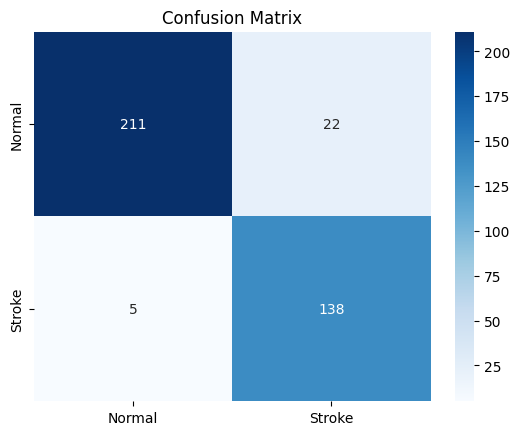

In [5]:
# =========================
# Brain Stroke Prediction - Optimized (Lightweight)
# =========================

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# =========================
# CONFIG
# =========================
DATA_DIR = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised"
BATCH_SIZE = 16   # reduced
IMG_SIZE = 128    # reduced
EPOCHS = 8        # fewer epochs (faster)
LR = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =========================
# DATA TRANSFORMS (lighter)
# =========================
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# =========================
# LOAD DATASET
# =========================
full_dataset = datasets.ImageFolder(DATA_DIR, transform=train_transforms)

# Split Train(70%) / Val(15%) / Test(15%)
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

val_dataset.dataset.transform = val_test_transforms
test_dataset.dataset.transform = val_test_transforms

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"Train: {len(train_dataset)} | Val: {len(val_dataset)} | Test: {len(test_dataset)}")
print("Classes:", full_dataset.classes)

# =========================
# MODEL (MobileNetV2)
# =========================
model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # 2 classes
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# =========================
# TRAINING LOOP
# =========================
def train_model():
    best_acc = 0
    for epoch in range(EPOCHS):
        model.train()
        running_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total

        # Validation
        model.eval()
        val_correct, val_total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total
        print(f"Epoch {epoch+1}/{EPOCHS} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_mobilenet.pth")

train_model()

# =========================
# EVALUATION
# =========================
model.load_state_dict(torch.load("best_mobilenet.pth"))
model.eval()

all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Classification Report:\n",
      classification_report(all_labels, all_preds, target_names=full_dataset.classes))

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=full_dataset.classes,
            yticklabels=full_dataset.classes, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


Train: 1750 | Val: 375 | Test: 376
Classes: ['Normal', 'Stroke']
Epoch 1/20 | Train Acc: 0.7394 | Val Acc: 0.8320 | Val Loss: 0.3921
Epoch 2/20 | Train Acc: 0.9326 | Val Acc: 0.8907 | Val Loss: 0.3040
Epoch 3/20 | Train Acc: 0.9520 | Val Acc: 0.7707 | Val Loss: 0.4873
Epoch 4/20 | Train Acc: 0.9760 | Val Acc: 0.9547 | Val Loss: 0.1156
Epoch 5/20 | Train Acc: 0.9749 | Val Acc: 0.9520 | Val Loss: 0.1394
Epoch 6/20 | Train Acc: 0.9880 | Val Acc: 0.9760 | Val Loss: 0.0996
Epoch 7/20 | Train Acc: 0.9777 | Val Acc: 0.9120 | Val Loss: 0.3167
Epoch 8/20 | Train Acc: 0.9931 | Val Acc: 0.9813 | Val Loss: 0.0649
Epoch 9/20 | Train Acc: 0.9857 | Val Acc: 0.9067 | Val Loss: 0.2120
Epoch 10/20 | Train Acc: 0.9800 | Val Acc: 0.9307 | Val Loss: 0.2553
Epoch 11/20 | Train Acc: 0.9823 | Val Acc: 0.9120 | Val Loss: 0.2198
Epoch 12/20 | Train Acc: 0.9920 | Val Acc: 0.8960 | Val Loss: 0.4292
Epoch 13/20 | Train Acc: 0.9800 | Val Acc: 0.9733 | Val Loss: 0.0707
Early stopping triggered after epoch 13
Classif

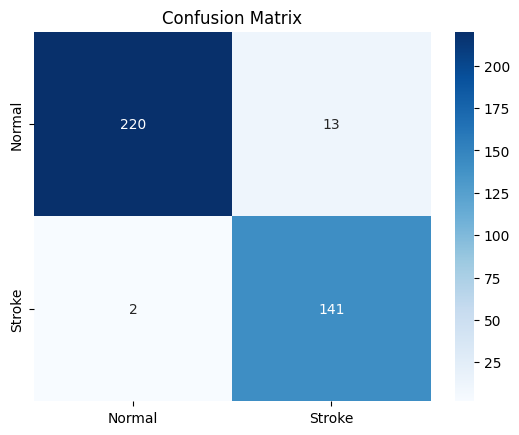

In [15]:
# =========================
# Brain Stroke Prediction - Optimized (Lightweight)
# =========================

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# CONFIG
# =========================
DATA_DIR = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised"
BATCH_SIZE = 16
IMG_SIZE = 224  # Updated to 224x224
EPOCHS = 20     # Increased epochs
LR = 3e-4       # Updated learning rate
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
PATIENCE = 5    # For early stopping

# =========================
# DATA TRANSFORMS (ImageNet normalization)
# =========================
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# =========================
# LOAD DATASET
# =========================
full_dataset = datasets.ImageFolder(DATA_DIR, transform=train_transforms)

# Split Train(70%) / Val(15%) / Test(15%)
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

val_dataset.dataset.transform = val_test_transforms
test_dataset.dataset.transform = val_test_transforms

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"Train: {len(train_dataset)} | Val: {len(val_dataset)} | Test: {len(test_dataset)}")
print("Classes:", full_dataset.classes)

# =========================
# CLASS WEIGHTS
# =========================
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(full_dataset.targets),
                                     y=full_dataset.targets)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(DEVICE)

# =========================
# MODEL (MobileNetV2)
# =========================
model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # 2 classes
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=LR)

# =========================
# TRAINING LOOP WITH EARLY STOPPING
# =========================
def train_model():
    best_acc = 0
    patience_counter = 0
    best_val_loss = float('inf')

    for epoch in range(EPOCHS):
        model.train()
        running_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        train_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        val_correct, val_total, val_running_loss = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total
        val_loss = val_running_loss / len(val_loader)
        print(f"Epoch {epoch+1}/{EPOCHS} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Val Loss: {val_loss:.4f}")

        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_mobilenet.pth")
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping
        if patience_counter >= PATIENCE:
            print(f"Early stopping triggered after epoch {epoch+1}")
            break

train_model()

# =========================
# EVALUATION
# =========================
model.load_state_dict(torch.load("best_mobilenet.pth"))
model.eval()

all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Classification Report:\n",
      classification_report(all_labels, all_preds, target_names=full_dataset.classes))

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=full_dataset.classes,
            yticklabels=full_dataset.classes, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [8]:
import torch
from torchvision import transforms
from PIL import Image

# -------------------------
# CONFIG
# -------------------------
IMG_SIZE = 128  # must match training
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CLASS_NAMES = ["Normal", "Stroke"]  # must match dataset classes

# -------------------------
# TRANSFORMS (same as test)
# -------------------------
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# -------------------------
# INFERENCE FUNCTION
# -------------------------
def predict_image(img_path, model):
    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(DEVICE)

    model.eval()
    with torch.no_grad():
        outputs = model(image)
        probs = torch.softmax(outputs, dim=1)
        pred_idx = torch.argmax(probs, dim=1).item()
        confidence = probs[0][pred_idx].item()

    return CLASS_NAMES[pred_idx], confidence


In [14]:
label, conf = predict_image("/content/58 (36).jpg", model)
print(f"Prediction: {label} ({conf:.2f})")


Prediction: Normal (0.54)
